In [2]:
import pandas as pd
import matplotlib.pyplot as plt

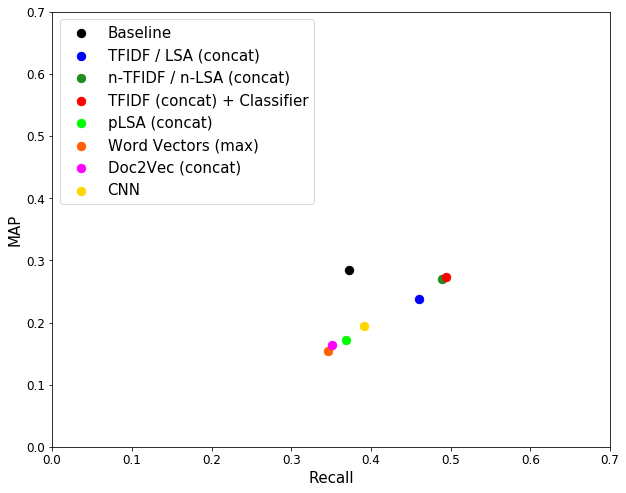

In [54]:
plt.figure(figsize=(10,8))
b_size= 70
plt.scatter(0.37240057946633,0.283920612444374,s = b_size, label="Baseline",c="#000000") # baseline
plt.scatter(0.460535571917647,0.237123636523345,s = b_size, label="TFIDF / LSA (concat)",c="#0000ff")
plt.scatter(0.48970595132017,0.269596359546176,s = b_size, label="n-TFIDF / n-LSA (concat)",c="#228B22")
plt.scatter(0.494161234347887,0.273475973108996,s = b_size, label="TFIDF (concat) + Classifier",c="#ff0000")
plt.scatter(0.368944332411011,0.171653624635148,s = b_size, label="pLSA (concat)",c="#00ff00")
plt.scatter(0.345729962950804, 0.153743275202498, s = b_size, label = "Word Vectors (max)", c="#FF6103")
plt.scatter(0.351639075177038, 0.164163631342265, s = b_size, label = "Doc2Vec (concat)", c="#FF00FF")
plt.scatter(0.391361440697838, 0.194711035628121, s = b_size, label = "CNN", c = "#FFD700")
plt.xlim((0, 0.7))
plt.ylim((0,0.7))
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("Recall", fontsize = 15)
plt.ylabel("MAP", fontsize = 15)
plt.legend(loc=2, fontsize = 15)
plt.show()

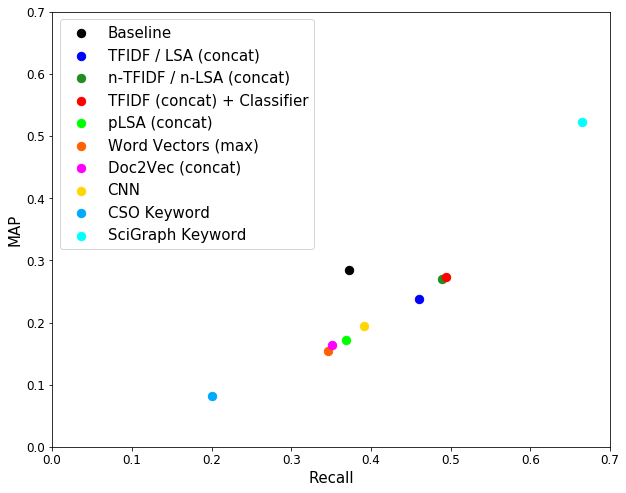

In [55]:
plt.figure(figsize=(10,8))
b_size= 70
plt.scatter(0.37240057946633,0.283920612444374,s = b_size, label="Baseline",c="#000000") # baseline
plt.scatter(0.460535571917647,0.237123636523345,s = b_size, label="TFIDF / LSA (concat)",c="#0000ff")
plt.scatter(0.48970595132017,0.269596359546176,s = b_size, label="n-TFIDF / n-LSA (concat)",c="#228B22")
plt.scatter(0.494161234347887,0.273475973108996,s = b_size, label="TFIDF (concat) + Classifier",c="#ff0000")
plt.scatter(0.368944332411011,0.171653624635148,s = b_size, label="pLSA (concat)",c="#00ff00")
plt.scatter(0.345729962950804, 0.153743275202498, s = b_size, label = "Word Vectors (max)", c="#FF6103")
plt.scatter(0.351639075177038, 0.164163631342265, s = b_size, label = "Doc2Vec (concat)", c="#FF00FF")
plt.scatter(0.391361440697838, 0.194711035628121, s = b_size, label = "CNN", c = "#FFD700")
plt.scatter(0.201191201988463,0.0814726106171956, s = b_size, label="CSO Keyword",c="#00aaff")
plt.scatter(0.664517033506238, 0.522181777519648, s = b_size, label = "SciGraph Keyword", c="#00FFFF")
plt.xlim((0, 0.7))
plt.ylim((0,0.7))
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("Recall", fontsize = 15)
plt.ylabel("MAP", fontsize = 15)
plt.legend(loc=2, fontsize = 15)
plt.show()

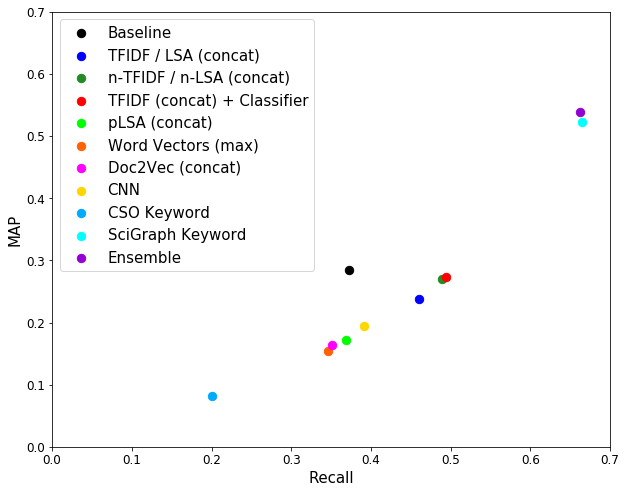

In [56]:
plt.figure(figsize=(10,8))
b_size= 70
plt.scatter(0.37240057946633,0.283920612444374,s = b_size, label="Baseline",c="#000000") # baseline
plt.scatter(0.460535571917647,0.237123636523345,s = b_size, label="TFIDF / LSA (concat)",c="#0000ff")
plt.scatter(0.48970595132017,0.269596359546176,s = b_size, label="n-TFIDF / n-LSA (concat)",c="#228B22")
plt.scatter(0.494161234347887,0.273475973108996,s = b_size, label="TFIDF (concat) + Classifier",c="#ff0000")
plt.scatter(0.368944332411011,0.171653624635148,s = b_size, label="pLSA (concat)",c="#00ff00")
plt.scatter(0.345729962950804, 0.153743275202498, s = b_size, label = "Word Vectors (max)", c="#FF6103")
plt.scatter(0.351639075177038, 0.164163631342265, s = b_size, label = "Doc2Vec (concat)", c="#FF00FF")
plt.scatter(0.391361440697838, 0.194711035628121, s = b_size, label = "CNN", c = "#FFD700")
plt.scatter(0.201191201988463,0.0814726106171956, s = b_size, label="CSO Keyword",c="#00aaff")
plt.scatter(0.664517033506238, 0.522181777519648, s = b_size, label = "SciGraph Keyword", c="#00FFFF")
plt.scatter(0.661820569338273, 0.539456574575932, s = b_size, label = "Ensemble", c="#9400D3")
plt.xlim((0, 0.7))
plt.ylim((0,0.7))
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12)
plt.xlabel("Recall", fontsize = 15)
plt.ylabel("MAP", fontsize = 15)
plt.legend(loc=2, fontsize = 15)
plt.show()

In [22]:
lens = [1, 0, 0, 241, 11, 0, 3, 323, 2, 0, 1, 15, 0, 11, 6, 19, 0, 1, 1, 22, 1, 8, 2, 0, 107, 32, 2, 3, 0, 1, 61, 9, 2, 7, 52, 212, 0, 54, 6, 49, 764, 59, 9, 19, 8, 44, 102, 9, 2, 1, 80, 153, 35, 8, 105, 0, 0, 103, 18, 0, 0, 0, 0, 1, 0, 4, 0, 2, 0, 2, 2, 43, 2, 47, 85, 10, 195, 320, 24, 18, 1, 7, 4, 121, 0, 113, 15, 110, 1, 2, 0, 4, 1, 1, 20, 12, 0, 19, 29, 1, 1, 0, 47, 16, 6, 2, 2, 1, 0, 1, 124, 7, 10, 0, 1, 21, 5, 1, 74, 44, 0, 5, 2, 1, 0, 82, 207, 17, 1, 33, 1, 0, 0, 0, 0, 19, 36, 111, 4, 1, 23, 0, 0, 119, 1, 36]

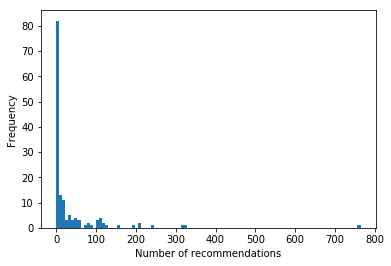

In [54]:
len_keywords = pd.DataFrame(lens)
len_keywords.plot(kind="hist",bins=100)
plt.legend().remove()
plt.xlabel("Number of recommendations")
plt.show()

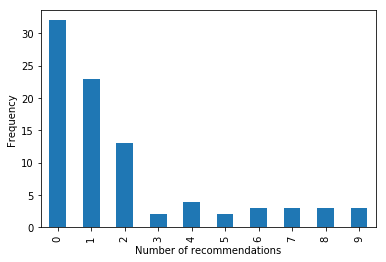

In [53]:
hist = len_keywords
hist["count"] = 0
hist = len_keywords.groupby(0).count().reset_index()
hist.columns = ["len","count"]
hist[hist["len"]<10]["count"].plot(kind="bar")
plt.xlabel("Number of recommendations")
plt.ylabel("Frequency")
plt.show()

In [55]:
print(len_keywords.median())
print(len_keywords.mean())
print(len_keywords.max())

0    4.0
dtype: float64
0    34.671233
dtype: float64
0    764
dtype: int64


# NN epoch graph

In [34]:
import os
import sys
import torch
import matplotlib.pyplot as plt

In [35]:
def plot_losses(fp):
    model_state = torch.load(fp)
    ymax = max((max(model_state["losses"][0]),max(model_state["losses"][1])))
    plt.plot(model_state["losses"][0])
    plt.plot(model_state["losses"][1])
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.legend(["train","eval"],loc=3)
    plt.ylim(ymin=0,ymax=ymax+0.5)
    plt.savefig("plot_losses.pdf", bbox_inches="tight")
    plt.show()

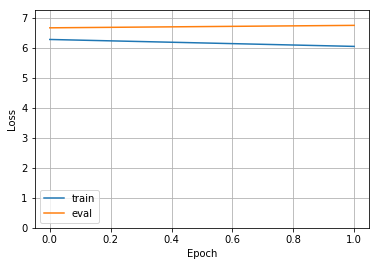

In [36]:
MODEL_NAME = "CNN-CPU-test"
EPOCH = None

file = "model-save-state" + (".e"+EPOCH if EPOCH is not None else "")
filepath = os.path.join(
    os.getcwd(),
    "..",
    "data",
    "processed",
    "nn",
    MODEL_NAME,
    file
)

plot_losses(filepath)